In [1]:
conda install -c plotly plotly=5.11.0

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [58]:
import numpy as np
import plotly
import matplotlib.pyplot as plt
from scipy.integrate import quad
import plotly.graph_objects as go
from IPython.display import HTML, display
import sympy as smp
from sympy.vector import cross

In [38]:
phi = np.linspace(0, 2*np.pi, 100)

def l(phi):
    return (1+3/4 * np.sin(3*phi)) * np.array([np.cos(phi), np.sin(phi), np.zeros(len(phi))])


In [39]:
lx, ly, lz = l(phi)

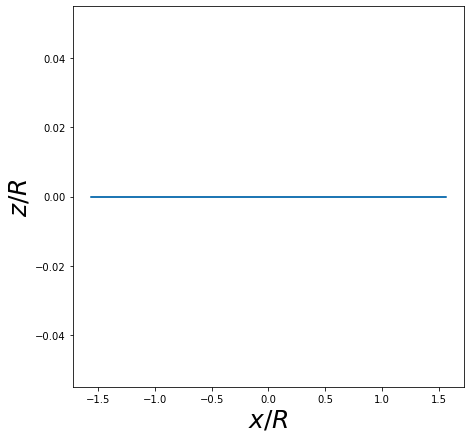

In [40]:
plt.figure(figsize=(7,7))
plt.plot(lx, lz)
plt.xlabel('$x/R$', fontsize=25)
plt.ylabel('$z/R$', fontsize=25)
plt.show()

In [41]:
t, x, y, z = smp.symbols('t, x, y, z')

In [42]:
l = (1+(3/4)*smp.sin(3*t))*smp.Matrix([smp.cos(t), smp.sin(t), 0])
#l = smp.Matrix([smp.cos(t), smp.sin(t), (t-smp.pi)/smp.pi])
r = smp.Matrix([x, y, z])
sep = r-l

In [43]:
integrand = smp.diff(l, t).cross(sep) / sep.norm()**3

In [44]:
dBxdt = smp.lambdify([t, x, y, z], integrand[0])
dBydt = smp.lambdify([t, x, y, z], integrand[1])
dBzdt = smp.lambdify([t, x, y, z], integrand[2])

In [45]:
def B(x, y, z):
    return np.array([quad(dBxdt, 0, 2*np.pi, args=(x, y, z))[0],
                     quad(dBydt, 0, 2*np.pi, args=(x, y, z))[0],
                     quad(dBzdt, 0, 2*np.pi, args=(x, y, z))[0]])

In [46]:
x = np.linspace(-2, 2, 20)
xv, yv, zv = np.meshgrid(x, x, x)

In [47]:
B_field = np.vectorize(B, signature='(),(),()->(n)')(xv, yv, zv)
Bx = B_field[:,:,:,0]
By = B_field[:,:,:,1]
Bz = B_field[:,:,:,2]

In [48]:
Bx[Bx>20] = 20
By[By>20] = 20
Bz[Bz>20] = 20

Bx[Bx<-20] = -20
By[By<-20] = -20
Bz[Bz<-20] = -20

In [49]:
xv.ravel()

array([-2., -2., -2., ...,  2.,  2.,  2.])

In [53]:
data = go.Cone(x=xv.ravel(), y=yv.ravel(), z=zv.ravel(),
               u=Bx.ravel(), v=By.ravel(), w=Bz.ravel(),
               colorscale='Inferno', colorbar=dict(title='$x^2$'),
               sizemode="absolute", sizeref=20)

layout = go.Layout(title=r'Plot Title',
                     scene=dict(xaxis_title=r'x',
                                yaxis_title=r'y',
                                zaxis_title=r'z',
                                aspectratio=dict(x=1, y=1, z=1),
                                camera_eye=dict(x=1.2, y=1.2, z=1.2)))

fig = go.Figure(data = data, layout=layout)
fig.add_scatter3d(x=lx, y=ly, z=lz, mode='lines',
                  line = dict(color='green', width=10))
HTML(fig.to_html())

<Figure size 1800x1200 with 0 Axes>

In [68]:
def wireB(r,N,I):
  #this calcualtes the magnetic field due to a wire
  #r is the distance above wire
  #N is the number of pieces
  #I is the current
  mp = 1e-7 #this is mu-0/4pi constant

I=0.1



N =8
  #total length
L =1
  #vector direction for each little piece
direction = [0,0,L/N]
dL=np.array(direction)

  #staring location of piece number 1
origin = [0,0,-L/2]
rI=np.array(direction) 

  #start a counter for total B
Bcounter = [0,0,0]
B=np.array(Bcounter) 

  #set observation
observation = [0,r,0]
obs=np.array(observation) 

while rI[2]<L/2:
    #calculate r
    rr = obs-rI
    #calculate small B
    dB = mp*np.cross(I*dL,rr)/magnitude(rr)**3
    #add to total B
    B=B+dB
    #move piece
    rI=rI+dL
return(B)


#print(wireB(0.02,8,.1))
tgraph=plot(xtitle="Number of Pieces",ytitle="Magnetic Field [T]")
f1=gcurve(color=color.blue,label="Numerical")
f2=gcurve(color=color.red,label="Theory")

dN=2
n=10
mp=1e-7
while n<50:
  Btemp=wireB(0.02,n,.1)
  Btheory=2*mp*.1/0.02
  f1.plot(n,mag(Btemp))
  f2.plot(n,Btheory)
  n=n+dN

<ipython-input-68-da8e7d5d0e78>:29: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



TypeError: cannot add <class 'sympy.matrices.dense.MutableDenseMatrix'> and <class 'float'>

In [70]:
conda install visvis

Solving environment: done

## Package Plan ##

  environment location: /Users/lucasmiller/opt/anaconda3

  added / updated specs:
    - visvis


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pyopengl-3.1.1a1           |   py38hecd8cb5_0         1.0 MB
    visvis-1.13.0              |     pyhd3eb1b0_0         4.3 MB
    ------------------------------------------------------------
                                           Total:         5.4 MB

The following NEW packages will be INSTALLED:

  pyopengl           pkgs/main/osx-64::pyopengl-3.1.1a1-py38hecd8cb5_0 None
  visvis             pkgs/main/noarch::visvis-1.13.0-pyhd3eb1b0_0 None



pyopengl-3.1.1a1     | 1.0 MB    | ##################################### | 100% 
visvis-1.13.0        | 4.3 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Retriev

In [1]:
# part of the magwire package

# calculate magnetic fields arising from electrical current through wires of arbitrary shape
# with the law of Biot-Savart

# written by Michael Wack
# wack@geophysik.uni-muenchen.de

# tested with python 3.4.3

from copy import deepcopy
import numpy as np
try:
    import visvis as vv
    visvis_avail = True
except ImportError:
    visvis_avail = False
    print("visvis not found.")


class Wire:
    '''
    represents an arbitrary 3D wire geometry
    '''
    def __init__(self, current=1, path=None, discretization_length=0.01):
        '''

        :param current: electrical current in Ampere used for field calculations
        :param path: geometry of the wire specified as path of n 3D (x,y,z) points in a numpy array with dimension n x 3
                     length unit is meter
        :param discretization_length: lenght of dL after discretization
        '''
        self.current = current
        self.path = path
        self.discretization_length = discretization_length


    @property
    def discretized_path(self):
        '''
        calculate end points of segments of discretized path
        approximate discretization lenghth is given by self.discretization_length
        elements will never be combined
        elements longer that self.dicretization_length will be divided into pieces
        :return: discretized path as m x 3 numpy array
        '''

        try:
            return self.dpath
        except AttributeError:
            pass

        self.dpath = deepcopy(self.path)
        for c in range(len(self.dpath)-2, -1, -1):
            # go backwards through all elements
            # length of element
            element = self.dpath[c+1]-self.dpath[c]
            el_len = np.linalg.norm(element)
            npts = int(np.ceil(el_len / self.discretization_length))  # number of parts that this element should be split up into
            if npts > 1:
                # element too long -> create points between
                # length of new sub elements
                sel = el_len / float(npts)
                for d in range(npts-1, 0, -1):
                    self.dpath = np.insert(self.dpath, c+1, self.dpath[c] + element / el_len * sel * d, axis=0)

        return self.dpath

    @property
    def IdL_r1(self):
        '''
        calculate discretized path elements dL and their center point r1
        :return: numpy array with I * dL vectors, numpy array of r1 vectors (center point of element dL)
        '''
        npts = len(self.discretized_path)
        if npts < 2:
            print("discretized path must have at least two points")
            return

        IdL = np.array([self.discretized_path[c+1]-self.discretized_path[c] for c in range(npts-1)]) * self.current
        r1 = np.array([(self.discretized_path[c+1]+self.discretized_path[c])*0.5 for c in range(npts-1)])

        return IdL, r1


    def vv_plot_path(self, discretized=True, color='r'):
        if not visvis_avail:
            print("plot path works only with visvis module")
            return

        if discretized:
            p = self.discretized_path
        else:
            p = self.path

        vv.plot(p, ms='x', mc=color, mw='2', ls='-', mew=0)


    def mpl3d_plot_path(self, discretized=True, show=True, ax=None, plt_style='-r'):

        if ax is None:
            fig = plt.figure(None)
            ax = ax3d.Axes3D(fig)
            
        if discretized:
            p = self.discretized_path
        else:
            p = self.path    

        ax.plot(p[:, 0], p[:, 1], p[:, 2], plt_style)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        # make all axes the same
        #max_a = np.array((p[:, 0], p[:, 1], p[:, 2])).max()

        #ax.set_xlim3d(min(p[:, 0]), max_a)
        #ax.set_ylim3d(min(p[:, 1]), max_a)
        #ax.set_zlim3d(min(p[:, 2]), max_a)


        if show:
            plt.show()

        return ax

    def ExtendPath(self, path):
        '''
        extends existing path by another one
        :param path: path to append
        '''
        if self.path is None:
            self.path = path
        else:
            # check if last point is identical to avoid zero length segments
            if self.path[-1] == path[0]:
                self.path=np.append(self.path, path[1:], axis=1)
            else:
                self.path=np.append(self.path, path, axis=1)

    def Translate(self, xyz):
        '''
        move the wire in space
        :param xyz: 3 component vector that describes translation in x,y and z direction
        '''
        if self.path is not None:
            self.path += np.array(xyz)

        return self

    def Rotate(self, axis=(1,0,0), deg=0):
        '''
        rotate wire around given axis by deg degrees
        :param axis: axis of rotation
        :param deg: angle
        '''
        if self.path is not None:
            n = axis
            ca = np.cos(np.radians(deg))
            sa = np.sin(np.radians(deg))
            R = np.array([[n[0]**2*(1-ca)+ca, n[0]*n[1]*(1-ca)-n[2]*sa, n[0]*n[2]*(1-ca)+n[1]*sa],
                          [n[1]*n[0]*(1-ca)+n[2]*sa, n[1]**2*(1-ca)+ca, n[1]*n[2]*(1-ca)-n[0]*sa],
                          [n[2]*n[0]*(1-ca)-n[1]*sa, n[2]*n[1]*(1-ca)+n[0]*sa, n[2]**2*(1-ca)+ca]])
            self.path = np.dot(self.path, R.T)

        return self



    # different standard paths
    @staticmethod
    def LinearPath(pt1=(0, 0, 0), pt2=(0, 0, 1)):
        return np.array([pt1, pt2]).T

    @staticmethod
    def RectangularPath(dx=0.1, dy=0.2):
        dx2 = dx/2.0; dy2 = dy/2.0
        return np.array([[dx2, dy2, 0], [dx2, -dy2, 0], [-dx2, -dy2, 0], [-dx2, dy2, 0], [dx2, dy2, 0]]).T

    @staticmethod
    def CircularPath(radius=0.1, pts=20):
        return Wire.EllipticalPath(rx=radius, ry=radius, pts=pts)

    @staticmethod
    def SinusoidalCircularPath(radius=0.1, amplitude=0.01, frequency=10, pts=100):
        t = np.linspace(0, 2 * np.pi, pts)
        return np.array([radius * np.sin(t), radius * np.cos(t), amplitude * np.cos(frequency*t)]).T

    @staticmethod
    def EllipticalPath(rx=0.1, ry=0.2, pts=20):
        t = np.linspace(0, 2 * np.pi, pts)
        return np.array([rx * np.sin(t), ry * np.cos(t), 0]).T

    @staticmethod
    def SolenoidPath(radius=0.1, pitch=0.01, turns=30, pts_per_turn=20):
        return Wire.EllipticalSolenoidPath(rx=radius, ry=radius, pitch=pitch, turns=turns, pts_per_turn=pts_per_turn)

    @staticmethod
    def EllipticalSolenoidPath(rx=0.1, ry=0.2, pitch=0.01, turns=30, pts_per_turn=20):
        t = np.linspace(0, 2 * np.pi * turns, pts_per_turn * turns)
        return np.array([rx * np.sin(t), ry * np.cos(t), t / (2 * np.pi) * pitch]).T

visvis not found.


In [2]:
conda install mayavi

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - mayavi -> python[version='>=2.7,<2.8.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that c

In [1]:
import numpy as np
from scipy import special
from mayavi import mlab

##############################################################################
# Function to caculate the Magnetic field generated by a current loop

def base_vectors(n):
    """ Returns 3 orthognal base vectors, the first one colinear to n.

        Parameters
        -----------
        n: ndarray, shape (3, )
            A vector giving direction of the basis

        Returns
        -----------
        n: ndarray, shape (3, )
            The first vector of the basis
        l: ndarray, shape (3, )
            The second vector of the basis
        m: ndarray, shape (3, )
            The first vector of the basis

    """
    # normalize n
    n = n / (n**2).sum(axis=-1)

    # choose two vectors perpendicular to n
    # choice is arbitrary since the coil is symetric about n
    if  np.abs(n[0])==1 :
        l = np.r_[n[2], 0, -n[0]]
    else:
        l = np.r_[0, n[2], -n[1]]

    l = l / (l**2).sum(axis=-1)
    m = np.cross(n, l)
    return n, l, m


def magnetic_field(r, n, r0, R):
    """
    Returns the magnetic field from an arbitrary current loop calculated from
    eqns (1) and (2) in Phys Rev A Vol. 35, N 4, pp. 1535-1546; 1987.

    Arguments
    ----------
        n: ndarray, shape (3, )
            The normal vector to the plane of the loop at the center,
            current is oriented by the right-hand-rule.
        r: ndarray, shape (m, 3)
            A position vector where the magnetic field is evaluated:
            [x1 y2 z3 ; x2 y2 z2 ; ... ]
            r is in units of d
        r0: ndarray, shape (3, )
            The location of the center of the loop in units of d: [x y z]
        R: float
            The radius of the current loop

    Returns
    --------
    B: ndarray, shape (m, 3)
        a vector for the B field at each position specified in r
        in inverse units of (mu I) / (2 pi d)
        for I in amps and d in meters and mu = 4 pi * 10^-7 we get Tesla
    """
    ### Translate the coordinates in the coil's frame
    n, l, m = base_vectors(n)

    # transformation matrix coil frame to lab frame
    trans = np.vstack((l, m, n))
    # transformation matrix to lab frame to coil frame
    inv_trans = np.linalg.inv(trans)

    # point location from center of coil
    r = r - r0
    # transform vector to coil frame
    r = np.dot(r, inv_trans)

    #### calculate field

    # express the coordinates in polar form
    x = r[:, 0]
    y = r[:, 1]
    z = r[:, 2]
    rho = np.sqrt(x**2 + y**2)
    theta = np.arctan(x/y)
    theta[y==0] = 0

    E = special.ellipe((4 * R * rho)/( (R + rho)**2 + z**2))
    K = special.ellipk((4 * R * rho)/( (R + rho)**2 + z**2))
    Bz =  1/np.sqrt((R + rho)**2 + z**2) * (
                K
              + E * (R**2 - rho**2 - z**2)/((R - rho)**2 + z**2)
              )
    Brho = z/(rho*np.sqrt((R + rho)**2 + z**2)) * (
               -K
              + E * (R**2 + rho**2 + z**2)/((R - rho)**2 + z**2)
              )
    # On the axis of the coil we get a divided by zero here. This returns a
    # NaN, where the field is actually zero :
    Brho[np.isnan(Brho)] = 0
    Brho[np.isinf(Brho)] = 0
    Bz[np.isnan(Bz)]     = 0
    Bz[np.isinf(Bz)]     = 0

    B = np.c_[np.cos(theta)*Brho, np.sin(theta)*Brho, Bz ]

    # Rotate the field back in the lab's frame
    B = np.dot(B, trans)
    return B


def display_coil(n, r0, R, half=False):
    """
    Display a coils in the 3D view.
    If half is True, display only one half of the coil.
    """
    n, l, m = base_vectors(n)
    theta = np.linspace(0, (2-half)*np.pi, 30)
    theta = theta[..., np.newaxis]
    coil = np.atleast_1d(R)*(np.sin(theta)*l + np.cos(theta)*m)
    coil += r0
    coil_x = coil[:, 0]
    coil_y = coil[:, 1]
    coil_z = coil[:, 2]
    mlab.plot3d(coil_x, coil_y, coil_z,
            tube_radius=0.01,
            name='Coil %i' % display_coil.num,
            color=(0, 0, 0))
    display_coil.num += 1
    return coil_x, coil_y, coil_z

display_coil.num = 0

##############################################################################
# The grid of points on which we want to evaluate the field
X, Y, Z = np.mgrid[-0.15:0.15:31j, -0.15:0.15:31j, -0.15:0.15:31j]
# Avoid rounding issues :
f = 1e4  # this gives the precision we are interested by :
X = np.round(X * f) / f
Y = np.round(Y * f) / f
Z = np.round(Z * f) / f

r = np.c_[X.ravel(), Y.ravel(), Z.ravel()]

##############################################################################
# The coil positions

# The center of the coil
r0 = np.r_[0, 0, 0.1]
# The normal to the coils
n  = np.r_[0, 0, 1]
# The radius
R  = 0.1

# Add the mirror image of this coils relatively to the xy plane :
r0 = np.vstack((r0, -r0 ))
R  = np.r_[R, R]
n  = np.vstack((n, n))      # Helmoltz like configuration

##############################################################################
# Calculate field
# First initialize a container matrix for the field vector :
B = np.empty_like(r)
# Then loop through the different coils and sum the fields :
for this_n, this_r0, this_R in zip(n, r0, R):
  this_n    = np.array(this_n)
  this_r0   = np.array(this_r0)
  this_R    = np.array(this_R)
  B += magnetic_field(r, this_n, this_r0, this_R)


Bx = B[:, 0]
By = B[:, 1]
Bz = B[:, 2]
Bx.shape = X.shape
By.shape = Y.shape
Bz.shape = Z.shape

Bnorm = np.sqrt(Bx**2 + By**2 + Bz**2)

##############################################################################
# Visualization

# We threshold the data ourselves, as the threshold filter produce a
# data structure inefficient with IsoSurface
Bmax = 100

Bx[Bnorm > Bmax] = 0
By[Bnorm > Bmax] = 0
Bz[Bnorm > Bmax] = 0
Bnorm[Bnorm > Bmax] = Bmax

mlab.figure(1, bgcolor=(1, 1, 1), fgcolor=(0.5, 0.5, 0.5),
               size=(480, 480))
mlab.clf()

for this_n, this_r0, this_R in zip(n, r0, R):
  display_coil(this_n, this_r0, this_R)

field = mlab.pipeline.vector_field(X, Y, Z, Bx, By, Bz,
                                  scalars=Bnorm, name='B field')
vectors = mlab.pipeline.vectors(field,
                      scale_factor=(X[1, 0, 0] - X[0, 0, 0]),
                      )
# Mask random points, to have a lighter visualization.
vectors.glyph.mask_input_points = True
vectors.glyph.mask_points.on_ratio = 6

vcp = mlab.pipeline.vector_cut_plane(field)
vcp.glyph.glyph.scale_factor=5*(X[1, 0, 0] - X[0, 0, 0])
# For prettier picture:
#vcp.implicit_plane.widget.enabled = False

iso = mlab.pipeline.iso_surface(field,
                                contours=[0.1*Bmax, 0.4*Bmax],
                                opacity=0.6,
                                colormap='YlOrRd')

# A trick to make transparency look better: cull the front face
iso.actor.property.frontface_culling = True

mlab.view(39, 74, 0.59, [.008, .0007, -.005])

mlab.show()

ModuleNotFoundError: No module named 'mayavi'